In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 160

In [2]:
data = pd.read_csv('data/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv', parse_dates=['DATE'])
data = data.set_index(pd.DatetimeIndex(data['DATE']))
data.drop(['DATE'], axis = 1, inplace = True)
data.head()

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tedency_incr,pressure_tedency_decr,pressure_tedency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [3]:
plot_cols = ['dry_bulb_temp_f','relative_humidity','wind_speed','station_pressure','precip']

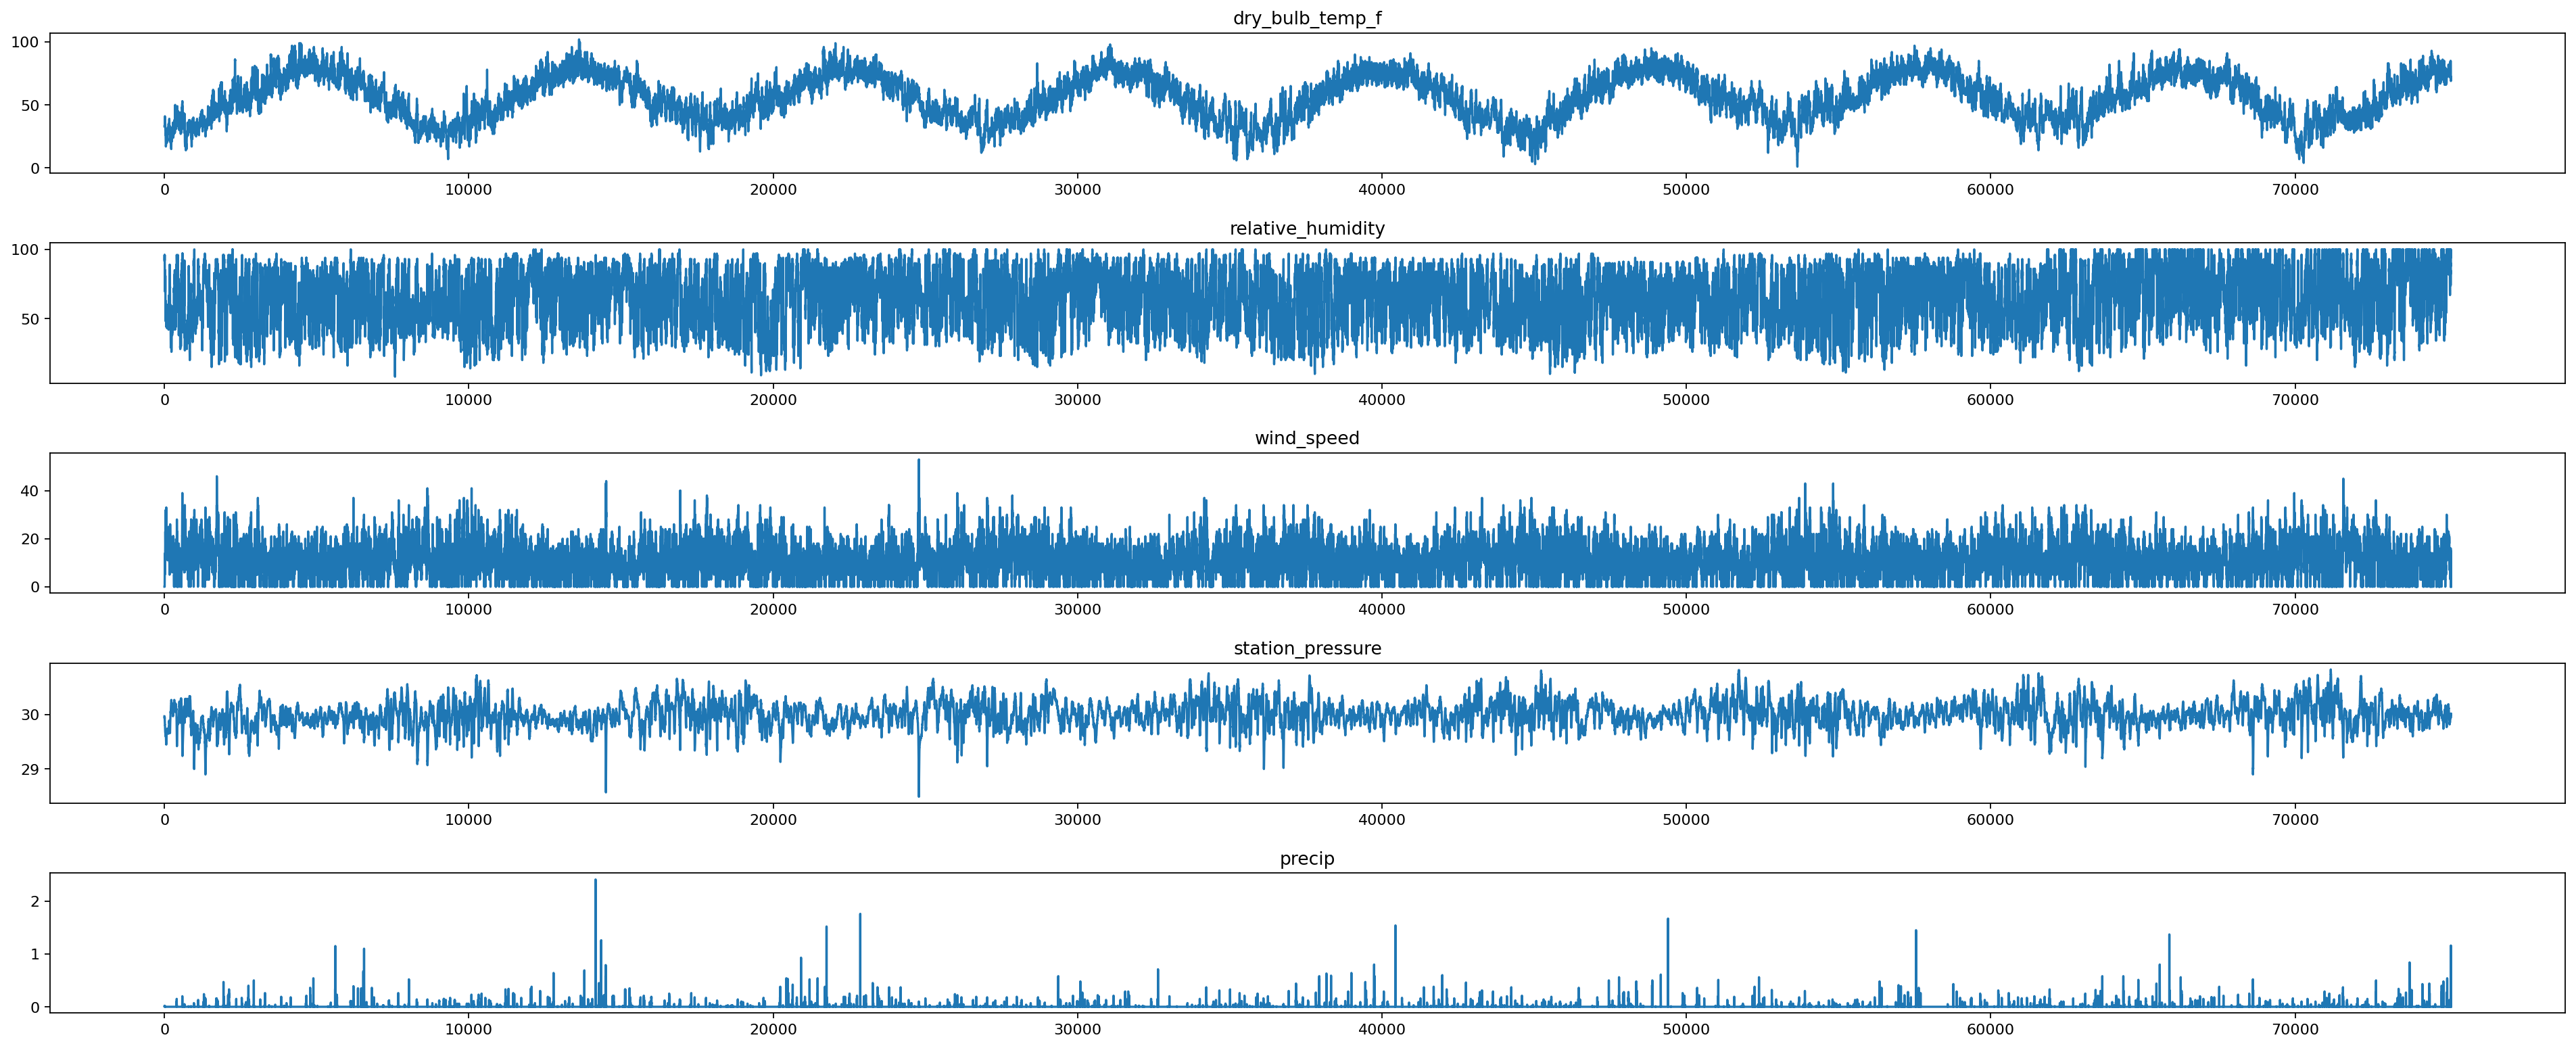

In [4]:
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

C:\Users\RABINDRA SRIVASTAVA\AppData\Local\Temp\ipykernel_9620\947596409.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

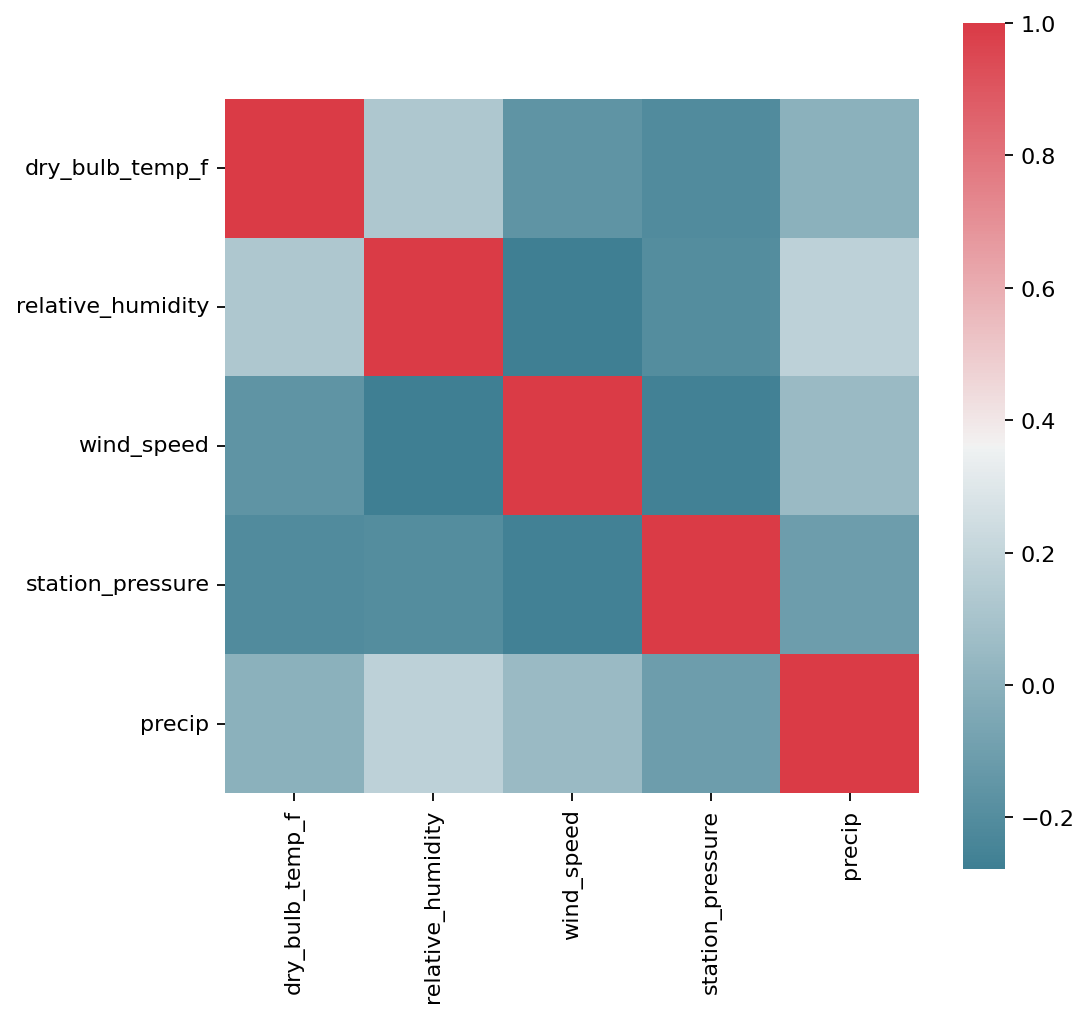

In [5]:
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

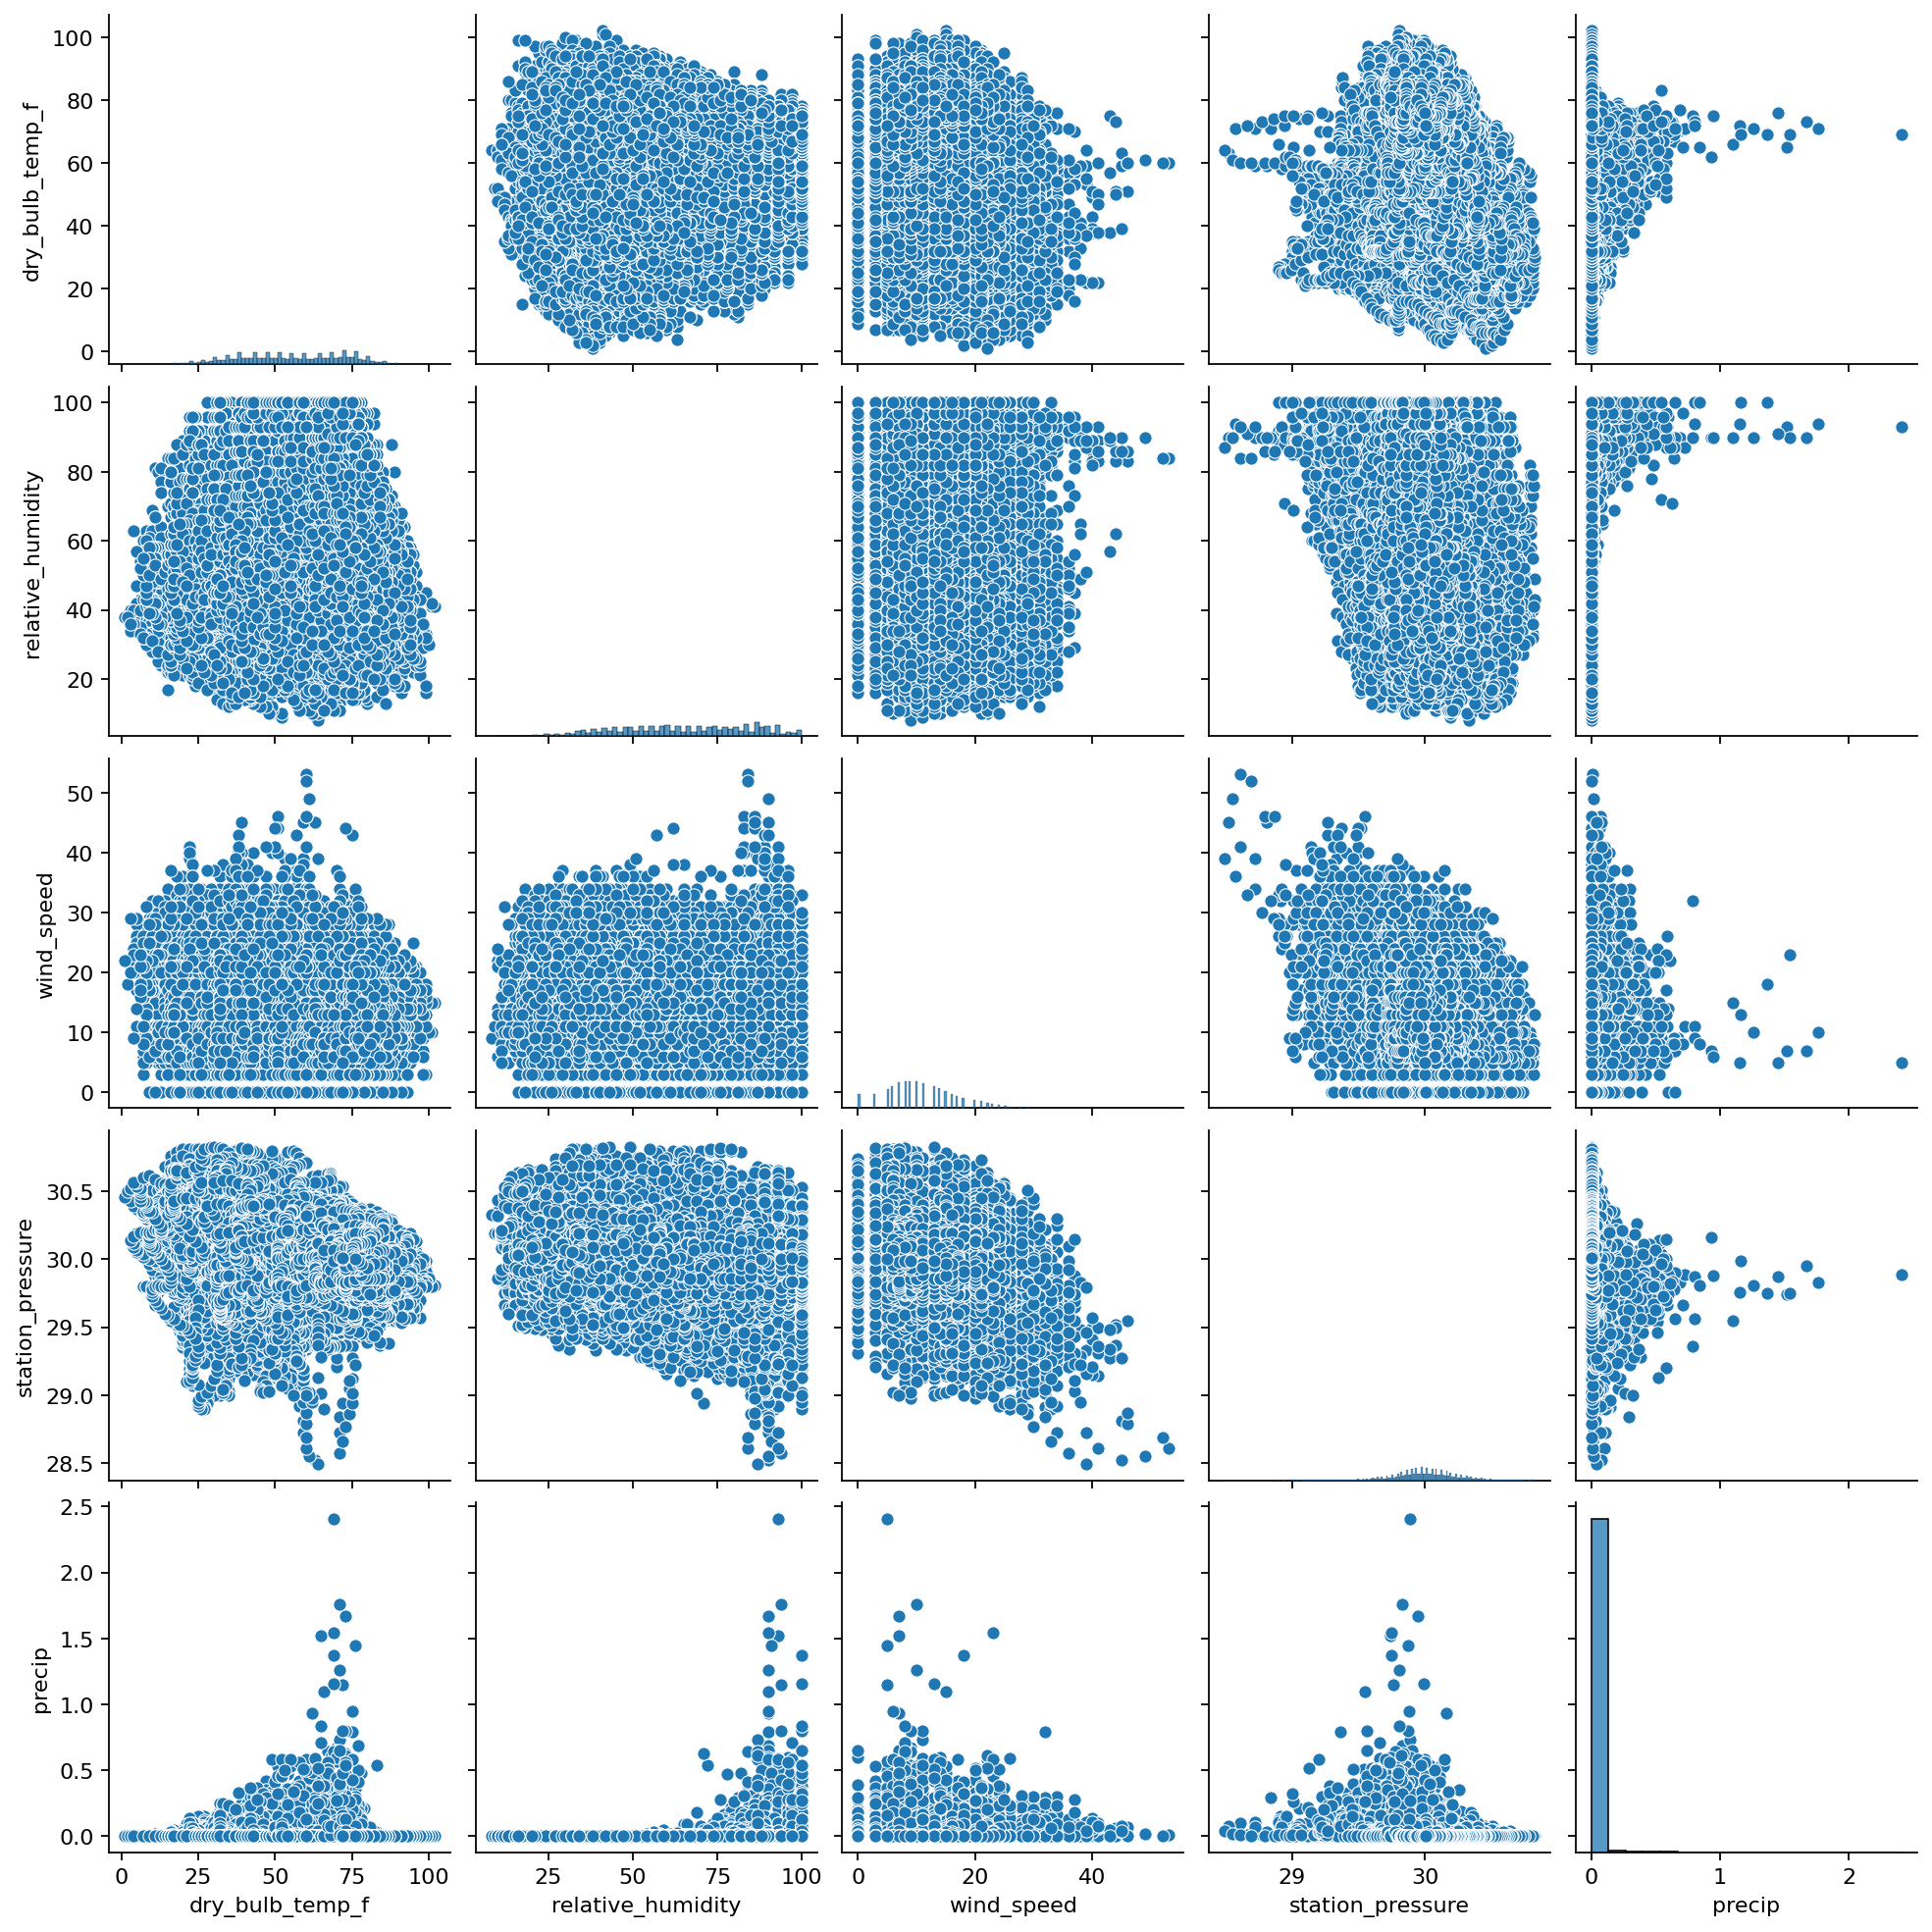

In [6]:
sns.pairplot(data[plot_cols])

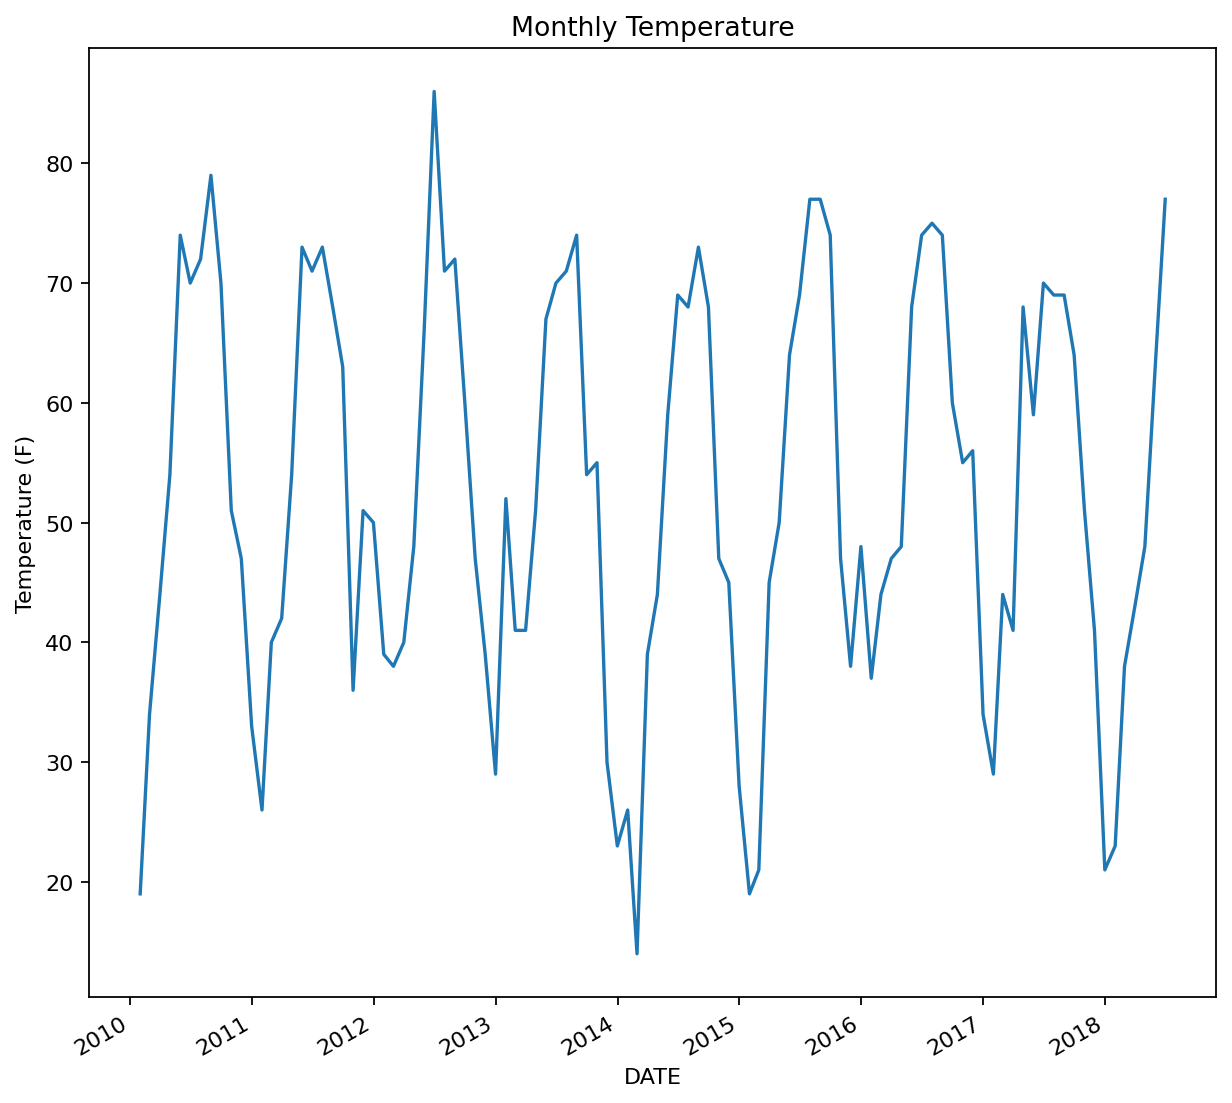

In [7]:
plt.figure(figsize=(15, 7))
TEMP_COL = 'dry_bulb_temp_f'
plt.subplot(1, 2, 1)
data[TEMP_COL].asfreq('M').plot()
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()


C:\Users\RABINDRA SRIVASTAVA\AppData\Local\Temp\ipykernel_9620\3850436384.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2017'][TEMP_COL].asfreq('D').div(data['2017'][TEMP_COL].asfreq('D').shift()).plot()
C:\Users\RABINDRA SRIVASTAVA\AppData\Local\Temp\ipykernel_9620\3850436384.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2017'][TEMP_COL].asfreq('D').diff().plot()


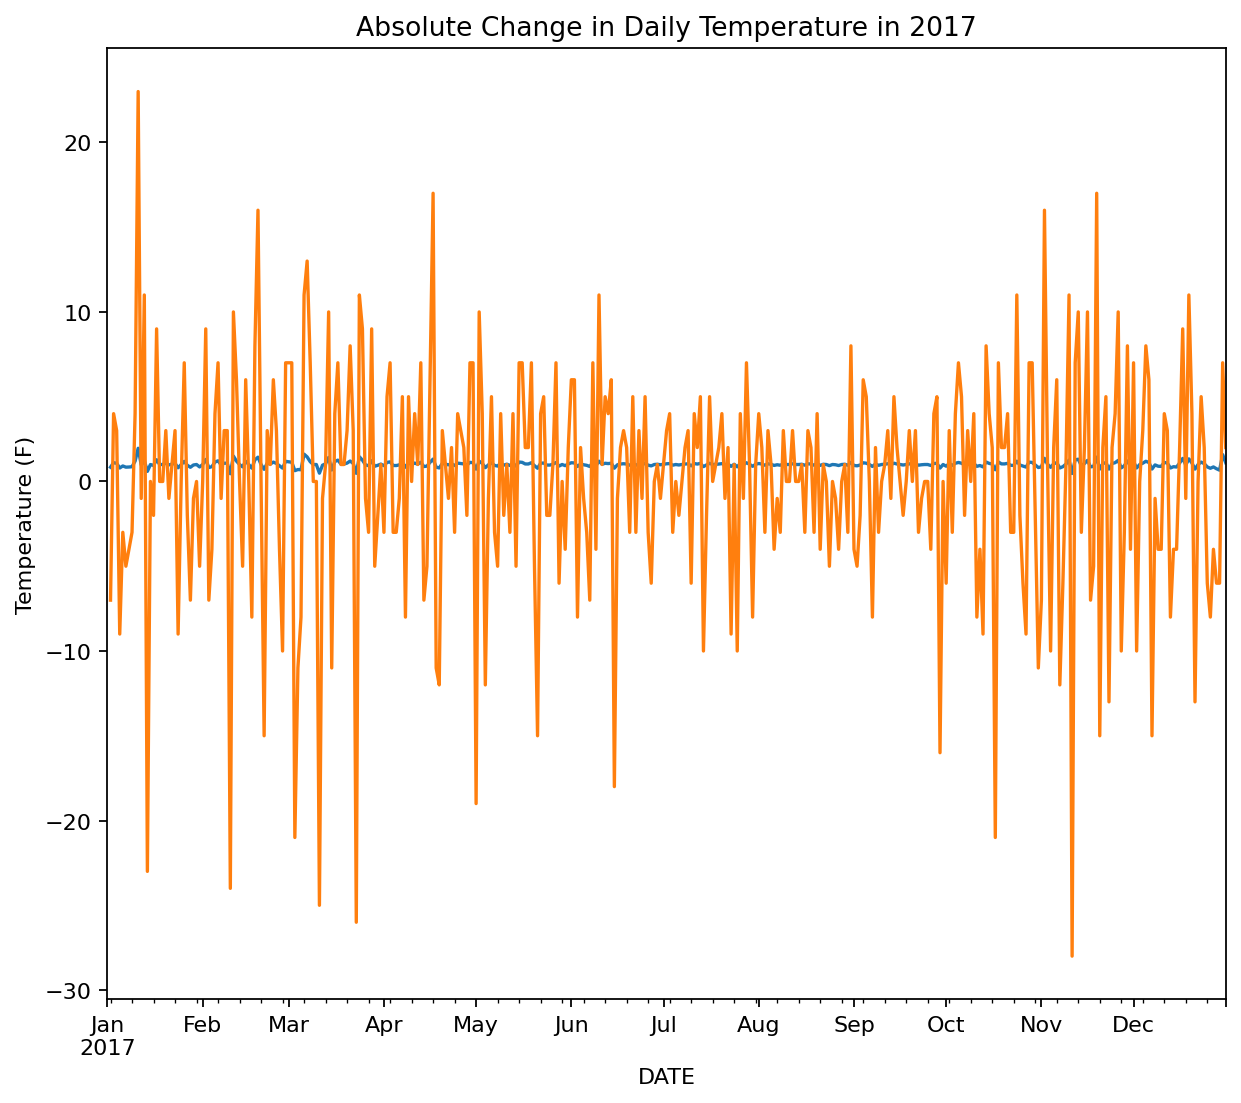

In [8]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
data['2017'][TEMP_COL].asfreq('D').div(data['2017'][TEMP_COL].asfreq('D').shift()).plot()
plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('% Change')

plt.subplot(1, 2, 1)
data['2017'][TEMP_COL].asfreq('D').diff().plot()
plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

C:\Users\RABINDRA SRIVASTAVA\AppData\Local\Temp\ipykernel_9620\1430637715.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2017'][TEMP_COL].rolling('5D').mean().plot(zorder=2)
C:\Users\RABINDRA SRIVASTAVA\AppData\Local\Temp\ipykernel_9620\1430637715.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2017'][TEMP_COL].plot(zorder=1)


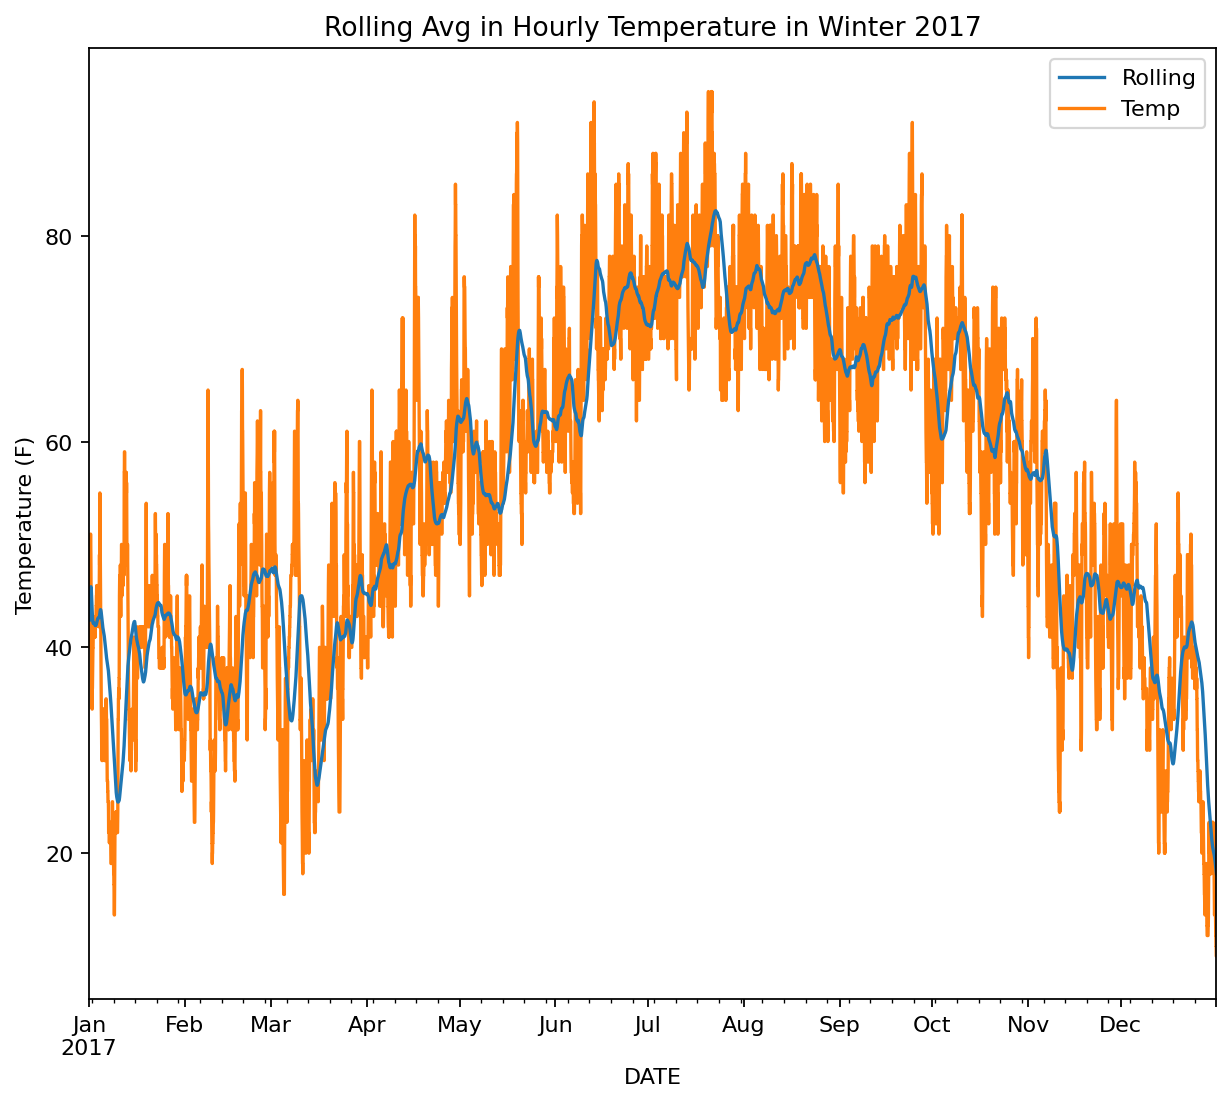

In [9]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
data['2017'][TEMP_COL].rolling('5D').mean().plot(zorder=2)
data['2017'][TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()